In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

##data downloaded from github 

In [11]:

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

checking the column names

In [12]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


checking the null values using heatmap, so to check this in values we will use below command

In [5]:
df.shape
#data has 13 columns and 614 rows

(614, 13)

<AxesSubplot:>

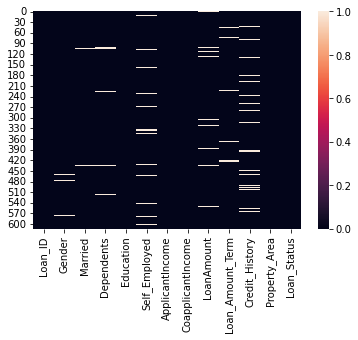

In [6]:
sns.heatmap(df.isnull())

# checking the count of null values

In [7]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# we will require encoding to convert oject into float which we will do later

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The gap between std dev and mean clearly indicated data has outliers , which we will check and remove later

In [9]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here we will replace NULL values with Mean or Mode
some of the column have char values i.e. Gender,Married,Self Employed,Dependents(There are values as 3+ , hence mode ios req) will go with replacing with NULL with Mode due to the charactristic of these columns and for rest we will use Mean

In [17]:
#using simple imputer strategy to replacce NAN values with mode 
import numpy as np
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))


In [18]:
#using simple imputer strategy to replacce NAN values with mean for rest of the columns
imp=SimpleImputer(missing_values=np.nan,strategy='mean')

df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History']=imp.fit_transform(df['Credit_History'].values.reshape(-1,1))


Now checking the null value status

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

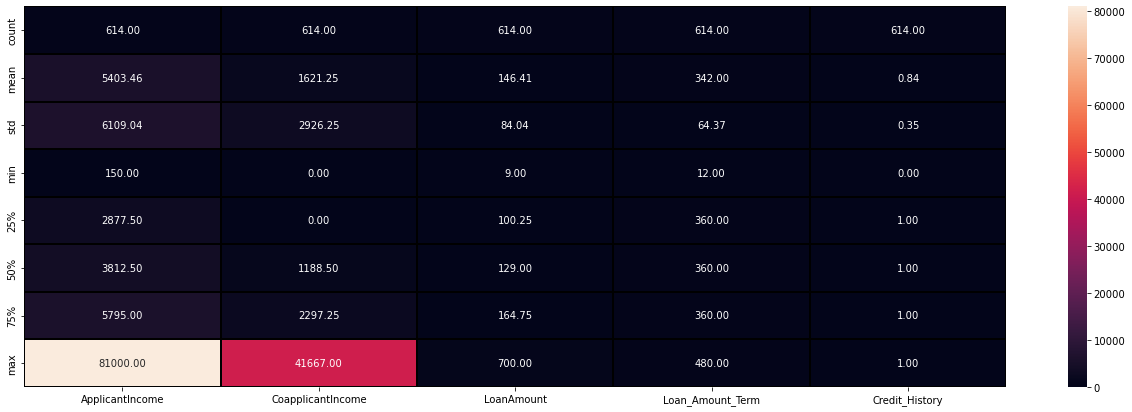

In [20]:
#Describing data in heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Above we can see data has outliers which we will remove later however we will first convert object datatypes to string using ordinal encoder


In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [23]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [24]:
df.dtypes

Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

Above we have replaced null values and then converted all float to string, now we will check correlation and individual column data distribution

In [25]:
#now we will check correlation using tables and charts
dfcorr=df.corr()
dfcorr


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


<AxesSubplot:>

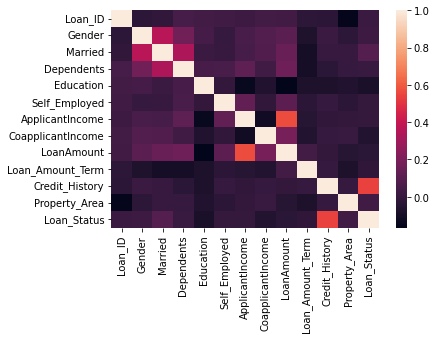

In [26]:
sns.heatmap(dfcorr)
#above observations can be seen in graph below

In [27]:
dfcorr["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Loan_ID              0.011773
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

From the above checks using correlation ,we can see Credit History is strongly correlated and all the other have very low correlation however we cant drop all of the rest so looking at the column names and as per my understanding we willdrop 
Loan_ID,Gender,Dependents,Self_Employed which are very low correlated 

In [28]:
df1=df.drop(['Loan_ID','Gender','Dependents','Self_Employed'],axis=1)
df1

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,0.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


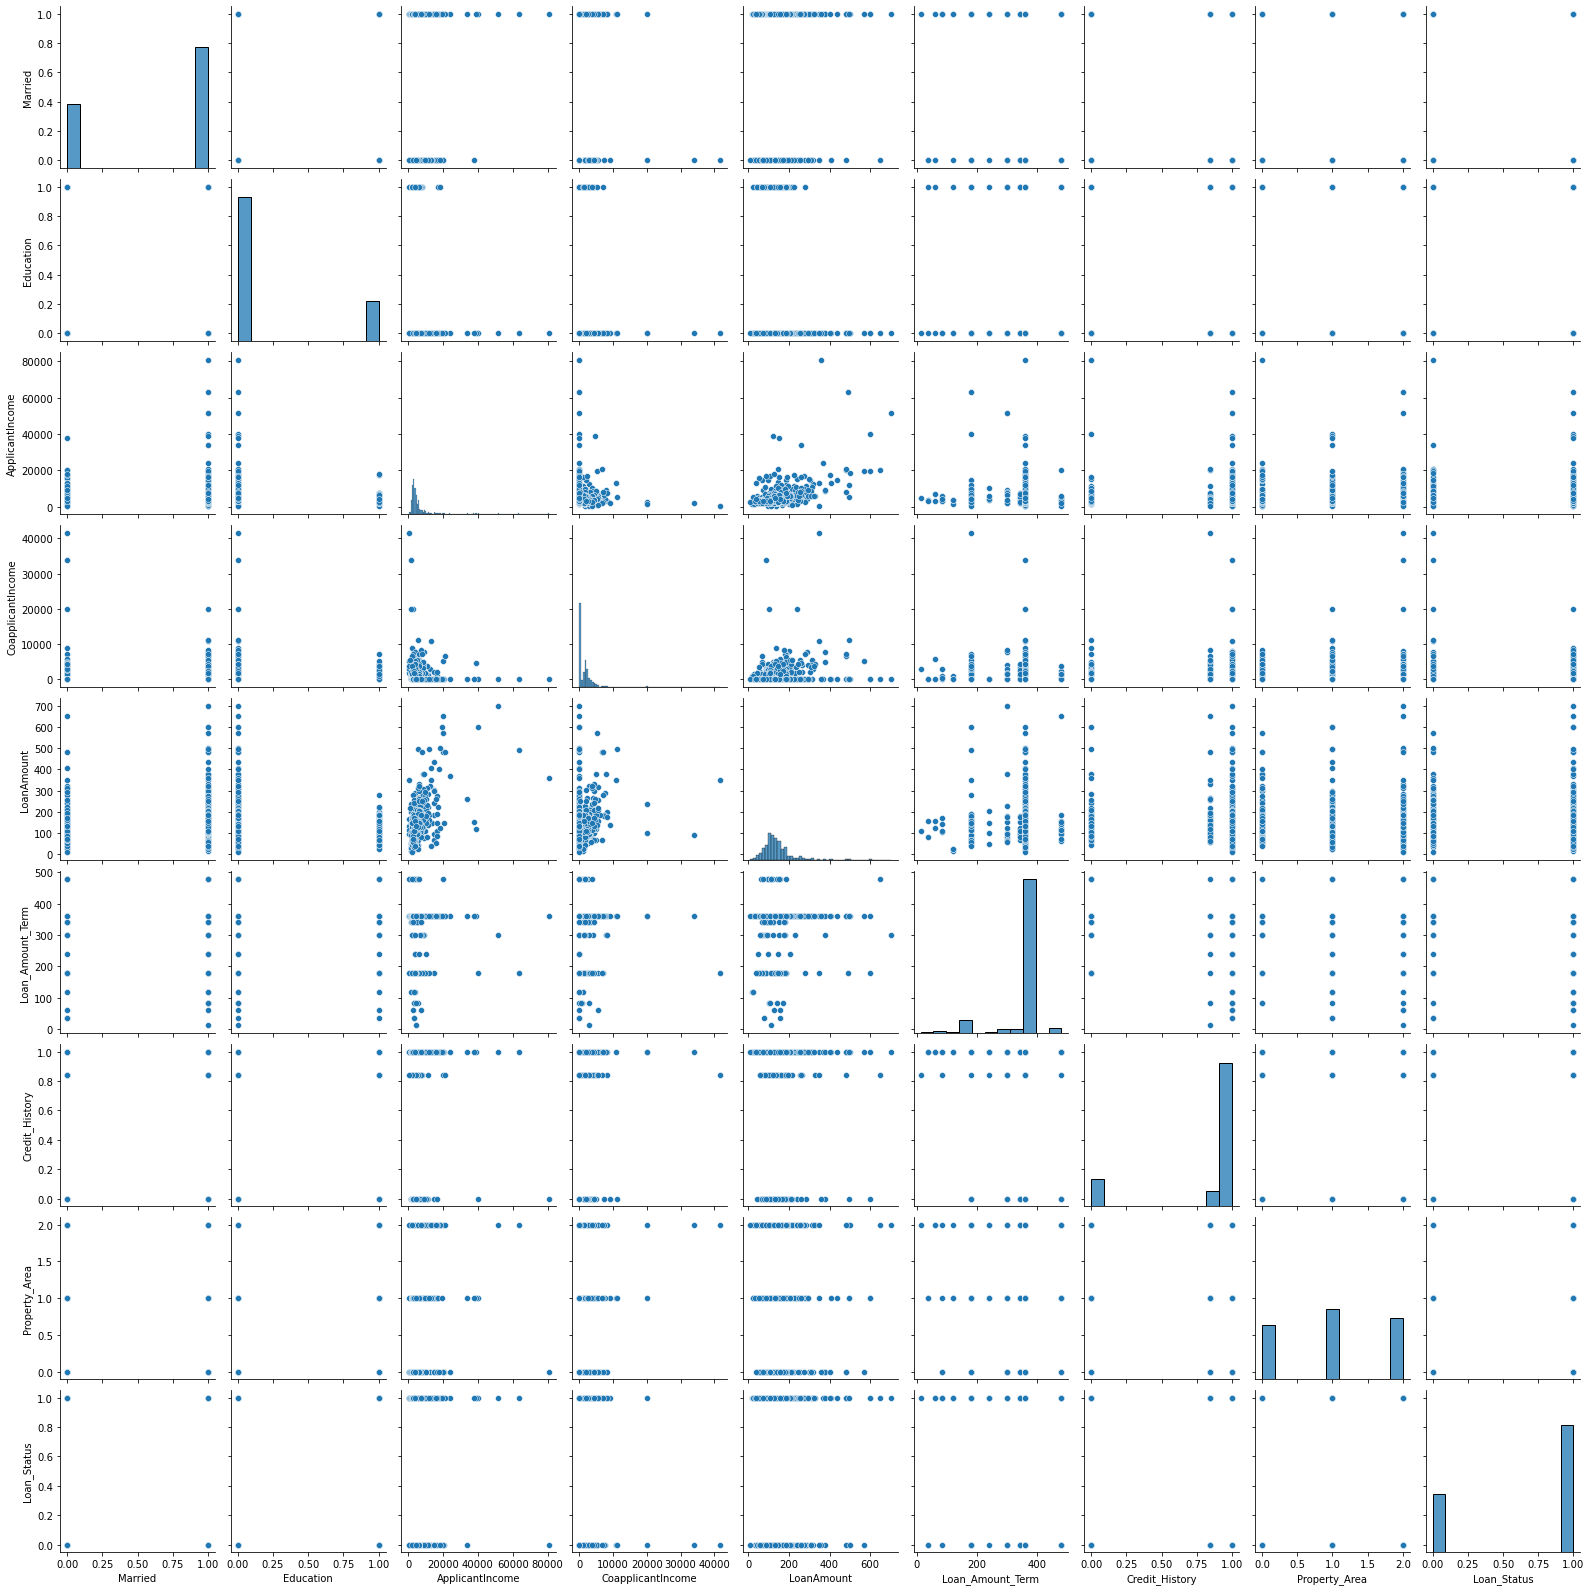

In [29]:
sns.pairplot(df1)
#to visually see positive , negative colrrelat

In [30]:
df1.columns

Index(['Married', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Married', ylabel='Density'>

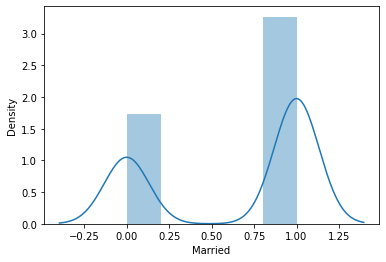

In [31]:
#we will check the data distribution using distplots
sns.distplot(df1['Married'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

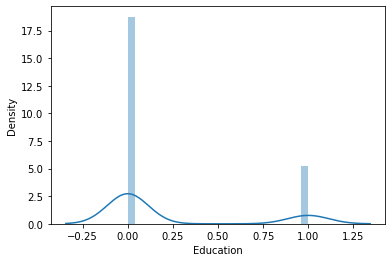

In [32]:
sns.distplot(df1['Education'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

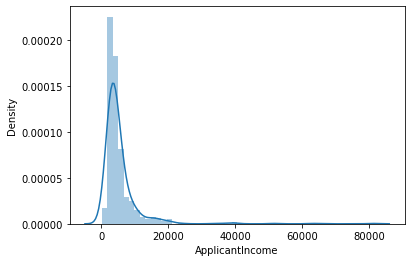

In [33]:
sns.distplot(df1['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

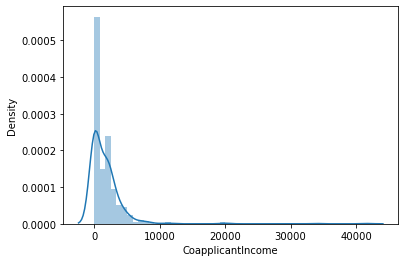

In [34]:
sns.distplot(df1['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

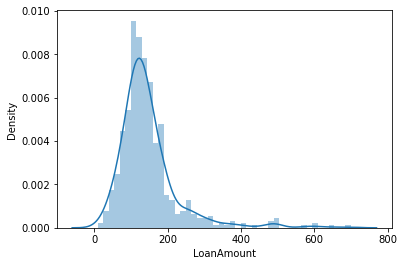

In [37]:
sns.distplot(df1['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

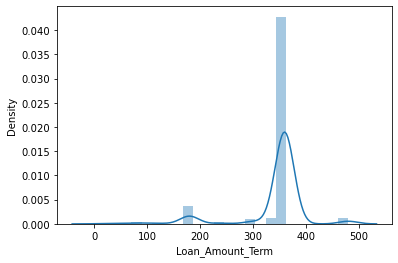

In [38]:
sns.distplot(df1['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

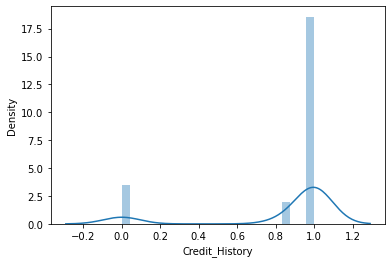

In [39]:
sns.distplot(df1['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

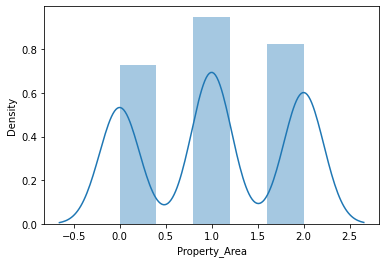

In [40]:
sns.distplot(df1['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

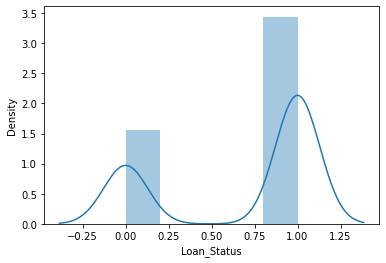

In [41]:
sns.distplot(df1['Loan_Status'])

Married                 AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Education            AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
ApplicantIncome      AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
CoapplicantIncome    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
LoanAmount           AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Loan_Amount_Term     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Credit_History       AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Property_Area              AxesSubplot(0.125,0.125;0.0945122x0.343182)
Loan_Status             AxesSubplot(0.238415,0.125;0.0945122x0.343182)
dtype: object

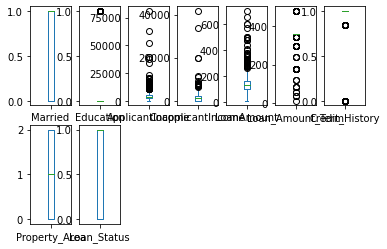

In [42]:
df1.plot(kind='box',subplots=True,layout=(2,7))
#from the above ditribution and below box plot the data clearly displays outliers which needs to be removed as per next code

As we have outliers in the data so we need to remove outliers first

In [43]:
#removing outliers from the  data using Zscore value
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.372089,0.528362,0.072991,0.554487,0.000000,0.279851,0.451640,1.223298,0.674519
1,0.728816,0.528362,0.134412,0.038732,0.219273,0.279851,0.451640,1.318513,1.482537
2,0.728816,0.528362,0.393747,0.554487,0.957641,0.279851,0.451640,1.223298,0.674519
3,0.728816,1.892641,0.462062,0.251980,0.314547,0.279851,0.451640,1.223298,0.674519
4,1.372089,0.528362,0.097728,0.554487,0.064454,0.279851,0.451640,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...
609,1.372089,0.528362,0.410130,0.554487,0.898095,0.279851,0.451640,1.318513,0.674519
610,0.728816,0.528362,0.212557,0.554487,1.267279,2.518655,0.451640,1.318513,0.674519
611,0.728816,0.528362,0.437174,0.472404,1.269371,0.279851,0.451640,1.223298,0.674519
612,0.728816,0.528362,0.357064,0.554487,0.483367,0.279851,0.451640,1.223298,0.674519


In [44]:
z=np.abs(zscore(df1))

In [45]:
z.shape

(614, 9)

In [46]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([3, 5, 5, 5, 2, 4, 5, 2, 4, 2, 4, 3, 4, 2, 2, 5, 5, 4, 4, 5, 2, 4,
       4, 3, 2, 3, 4, 2, 4, 5, 5, 4, 4, 4, 5, 4, 5, 3, 5, 3, 4],
      dtype=int64))


In [47]:
len(np.where(z>3)[0])

41

In [48]:
df2=df1[(z<3).all(axis=1)]

In [49]:
print("old dataframe",df1.shape)
print("new dataframe",df2.shape)
print("total dropped",df1.shape[0]-df2.shape[0])

old dataframe (614, 9)
new dataframe (577, 9)
total dropped 37


In [50]:
loss_percent=(614-577)/614*100
print(loss_percent,"%")
#here by removing the outliers loosign 6% of data which is fine as it will help in gettign better model accuracy

6.026058631921824 %


In [51]:
#we will now check skewness in data
df2.skew()

Married             -0.630211
Education            1.306588
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [52]:
# We will break data into input and output and then remove skewness
x=df2.drop("Loan_Status",axis=1)
y=df2["Loan_Status"]

In [53]:
x

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,1.0,0.0,3000,0.0,66.000000,360.0,1.0,2.0
3,1.0,1.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...
609,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0
610,1.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0
611,1.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0
612,1.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0


In [54]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 577, dtype: float64

In [55]:
#checking vif to identify multicollinierity 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)


,Variables,VIF Factor
0,Married,2.991671
1,Education,1.298061
2,ApplicantIncome,5.210700
3,CoapplicantIncome,2.413392
4,LoanAmount,11.143197
5,Loan_Amount_Term,12.408103
6,Credit_History,6.206805
7,Property_Area,2.601011


We will drop Property_Area to remove multicollinierity as they have very close VIF with Coapplicant Income

In [56]:
x1=x.drop(['Property_Area'],axis=1)
x1

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,0.0,5849,0.0,146.412162,360.0,1.0
1,1.0,0.0,4583,1508.0,128.000000,360.0,1.0
2,1.0,0.0,3000,0.0,66.000000,360.0,1.0
3,1.0,1.0,2583,2358.0,120.000000,360.0,1.0
4,0.0,0.0,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...
609,0.0,0.0,2900,0.0,71.000000,360.0,1.0
610,1.0,0.0,4106,0.0,40.000000,180.0,1.0
611,1.0,0.0,8072,240.0,253.000000,360.0,1.0
612,1.0,0.0,7583,0.0,187.000000,360.0,1.0


In [57]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [58]:
x2=power_transform(x1,method='yeo-johnson')
pd.DataFrame(x2).skew()

0   -0.630211
1    1.306588
2    0.027981
3   -0.191876
4    0.047692
5    0.718470
6   -1.588827
dtype: float64

In [59]:
#using scaling technique for scaling of independent data
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x2=st.fit_transform(x2)
x2

array([[-1.36251079, -0.54196123,  0.68177996, ...,  0.31607848,
         0.14260892,  0.51523634],
       [ 0.73393914, -0.54196123,  0.23478308, ..., -0.01587084,
         0.14260892,  0.51523634],
       [ 0.73393914, -0.54196123, -0.5272005 , ..., -1.4431122 ,
         0.14260892,  0.51523634],
       ...,
       [ 0.73393914, -0.54196123,  1.28165763, ...,  1.83809889,
         0.14260892,  0.51523634],
       [ 0.73393914, -0.54196123,  1.16442577, ...,  0.96155535,
         0.14260892,  0.51523634],
       [-1.36251079, -0.54196123,  0.23478308, ...,  0.07720357,
         0.14260892, -2.22500746]])

Now we have our input and output ready to be tested for model , As our output is Binary , we will test with Logistic Regression

In [60]:
lr=LogisticRegression()

In [61]:
#finding best random state

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=.20,random_state=i)
    lr.fit(x2_train,y_train)
    predlr=lr.predict(x2_test)
    acc=accuracy_score(y_test,predlr)
    print('accuracy',acc,'random_state',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

accuracy 0.8103448275862069 random_state 1
accuracy 0.7758620689655172 random_state 2
accuracy 0.7586206896551724 random_state 3
accuracy 0.7844827586206896 random_state 4
accuracy 0.7758620689655172 random_state 5
accuracy 0.8362068965517241 random_state 6
accuracy 0.7844827586206896 random_state 7
accuracy 0.7844827586206896 random_state 8
accuracy 0.7586206896551724 random_state 9
accuracy 0.8103448275862069 random_state 10
accuracy 0.7672413793103449 random_state 11
accuracy 0.8620689655172413 random_state 12
accuracy 0.75 random_state 13
accuracy 0.6896551724137931 random_state 14
accuracy 0.7931034482758621 random_state 15
accuracy 0.7758620689655172 random_state 16
accuracy 0.7931034482758621 random_state 17
accuracy 0.7155172413793104 random_state 18
accuracy 0.8275862068965517 random_state 19
accuracy 0.7758620689655172 random_state 20
accuracy 0.8362068965517241 random_state 21
accuracy 0.7758620689655172 random_state 22
accuracy 0.7413793103448276 random_state 23
accuracy 0.

accuracy 0.8362068965517241 random_state 192
accuracy 0.7844827586206896 random_state 193
accuracy 0.7586206896551724 random_state 194
accuracy 0.7844827586206896 random_state 195
accuracy 0.8275862068965517 random_state 196
accuracy 0.7931034482758621 random_state 197
accuracy 0.7931034482758621 random_state 198
accuracy 0.7758620689655172 random_state 199
Best Accuracy is 0.8706896551724138 on Random State 91


In [62]:
#Applying the above parameters to Logistic Regression 
lr=LogisticRegression()
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=.20,random_state=91)
lr.fit(x2_train,y_train)
predlr=lr.predict(x2_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
cvscore=cross_val_score(lr,x2,y,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.8706896551724138
[[17 11]
 [ 4 84]]
              precision    recall  f1-score   support

         0.0       0.81      0.61      0.69        28
         1.0       0.88      0.95      0.92        88

    accuracy                           0.87       116
   macro avg       0.85      0.78      0.81       116
weighted avg       0.87      0.87      0.86       116

cross val score: 0.7955322338830586


In [63]:
#Lets try with RandomForest Classifier model
from sklearn.ensemble import RandomForestClassifier
rfs=RandomForestClassifier(n_estimators=100,random_state=4)
rfs.fit(x2_train,y_train)
predrfs=rfs.predict(x2_test)
print(accuracy_score(y_test,predrfs))
print(confusion_matrix(y_test,predrfs))
print(classification_report(y_test,predrfs))
cvscore1=cross_val_score(rfs,x2,y,cv=5)
cvm1=cvscore1.mean()
print("cross val score:",cvm1)

0.8706896551724138
[[17 11]
 [ 4 84]]
              precision    recall  f1-score   support

         0.0       0.81      0.61      0.69        28
         1.0       0.88      0.95      0.92        88

    accuracy                           0.87       116
   macro avg       0.85      0.78      0.81       116
weighted avg       0.87      0.87      0.86       116

cross val score: 0.7955322338830585


In [64]:
#using Kneighbors Classifier to check results
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x2_train,y_train)
knn.score(x2_train,y_train)
predknn=knn.predict(x2_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))
cvscore2=cross_val_score(knn,x2,y,cv=5)
cvm2=cvscore2.mean()
print("cross val score:",cvm2)

0.8189655172413793
[[14 14]
 [ 7 81]]
              precision    recall  f1-score   support

         0.0       0.67      0.50      0.57        28
         1.0       0.85      0.92      0.89        88

    accuracy                           0.82       116
   macro avg       0.76      0.71      0.73       116
weighted avg       0.81      0.82      0.81       116

cross val score: 0.7903748125937031


In [75]:
#using support vector classifier
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x2_train,y_train)
svc.score(x2_train,y_train)
predsvc=svc.predict(x2_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
cvscore3=cross_val_score(svc,x2,y,cv=5)
cvm3=cvscore3.mean()
print("cross val score:",cvm3)

0.896551724137931
[[16 12]
 [ 0 88]]
              precision    recall  f1-score   support

         0.0       1.00      0.57      0.73        28
         1.0       0.88      1.00      0.94        88

    accuracy                           0.90       116
   macro avg       0.94      0.79      0.83       116
weighted avg       0.91      0.90      0.89       116

cross val score: 0.8197901049475261


In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x2_train,y_train)
dtc.score(x2_train,y_train)
preddtc=dtc.predict(x2_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
cvscore4=cross_val_score(dtc,x2,y,cv=5)
cvm4=cvscore4.mean()
print("cross val score:",cvm4)

0.75
[[19  9]
 [20 68]]
              precision    recall  f1-score   support

         0.0       0.49      0.68      0.57        28
         1.0       0.88      0.77      0.82        88

    accuracy                           0.75       116
   macro avg       0.69      0.73      0.70       116
weighted avg       0.79      0.75      0.76       116

cross val score: 0.7279310344827585


In [67]:
#Trying to boost the learning of decision tree classifier, estimators by default is 50

from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x2_train,y_train)
ad_pred=ad.predict(x2_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))
cvscore5=cross_val_score(ad,x2,y,cv=5)
cvm5=cvscore5.mean()
print("cross val score:",cvm5)

0.8362068965517241
[[17 11]
 [ 8 80]]
              precision    recall  f1-score   support

         0.0       0.68      0.61      0.64        28
         1.0       0.88      0.91      0.89        88

    accuracy                           0.84       116
   macro avg       0.78      0.76      0.77       116
weighted avg       0.83      0.84      0.83       116

cross val score: 0.79904047976012


In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x2_train,y_train)
gb_pred=gb.predict(x2_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
cvscore6=cross_val_score(gb,x2,y,cv=5)
cvm6=cvscore6.mean()
print("cross val score:",cvm6)

0.8275862068965517
[[17 11]
 [ 9 79]]
              precision    recall  f1-score   support

         0.0       0.65      0.61      0.63        28
         1.0       0.88      0.90      0.89        88

    accuracy                           0.83       116
   macro avg       0.77      0.75      0.76       116
weighted avg       0.82      0.83      0.83       116

cross val score: 0.7834632683658171


Hypertuning below for the algorithm selected as Random Forest Classifier

In [69]:
RandomForestClassifier()

RandomForestClassifier()

In [70]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'criterion' :['gini','entropy']}

In [71]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x2_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt'}

In [72]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [73]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='sqrt')

In [74]:
GCV_pred=GCV.best_estimator_.predict(x2_test)
accuracy_score(y_test,GCV_pred)
print(accuracy_score(y_test,GCV_pred))
print(confusion_matrix(y_test,GCV_pred))
print(classification_report(y_test,GCV_pred))
cvscore7=cross_val_score(GCV.best_estimator_,x2,y,cv=5)
cvm7=cvscore7.mean()
print("cross val score:",cvm7)

0.8793103448275862
[[18 10]
 [ 4 84]]
              precision    recall  f1-score   support

         0.0       0.82      0.64      0.72        28
         1.0       0.89      0.95      0.92        88

    accuracy                           0.88       116
   macro avg       0.86      0.80      0.82       116
weighted avg       0.88      0.88      0.87       116

cross val score: 0.8007046476761619


Logistic Regression comes with 87% accuracy score , 87% accuracy in F1 Score and 79 % Cross Val Score

RandomForestClassifier 87% accuracy score ,87 % accuracy in F1 score and 79 % Cross Val score

KNeighborsClassifier 81 % accuracy , 82 % accuracy in F1 score and 79 % Cross Val score

support vector classifier using kernel as poly 89 % accuracy , 90 % accuracy in F1 score and 81 % Cross Val score

DecisionTreeClassifier 75% accuracy , 75 % accuracy in F1 score and 72 % Cross Val score

AdaBoostClassifier 83 % accuracy , 84 % accuracy in F1 score and 79 % Cross Val score

GradientBoostingClassifier 82 % accuracy , 83 % accuracy in F1 score and 78 % Cross Val score

By doing Hypertuning using RandomForestClassifier with best param 87 % accuracy , 88 % accuracy in F1 score and 80 % Cross Val score

We select support vector classifier using kernel as poly 89 % accuracy , 90 % accuracy in F1 score and 81 % Cross Val score as final model



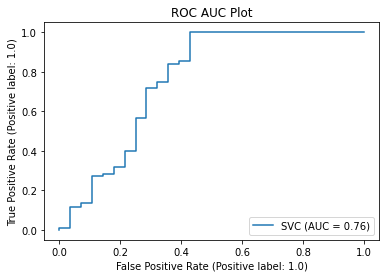

In [78]:
#Lets plot AUC ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x2_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

In [79]:
#we will save this model
import pickle

In [80]:
filename='loanstatus.pkl'
pickle.dump(svc,open(filename,'wb'))

In [81]:
#Conclusion 
loaded_model=pickle.load(open('loanstatus.pkl','rb'))
result=loaded_model.score(x2_test,y_test)
print(result)
                        

0.896551724137931


In [82]:
#predicting the rain tomorrow using the model saved
conclusion=pd.DataFrame([loaded_model.predict(x2_test)[:],predsvc[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
Predicted,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
Original,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
